In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [4]:
classes = ['cats', 'dogs']
train_path = '/content/drive/MyDrive/Kaushik/train'
test_path = '/content/drive/MyDrive/Kaushik/test'
lr = 0.0001
epochs = 15
algorithm = 'Vgg'

In [5]:
train_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(
    directory=train_path,
    target_size=(224,224),
    classes=['cats', 'dogs'],
    batch_size=10, shuffle=True)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(
    directory=test_path,
    target_size=(224,224),
    classes=['cats', 'dogs'],
    batch_size=10, shuffle=False)

Found 4100 images belonging to 2 classes.
Found 2178 images belonging to 2 classes.


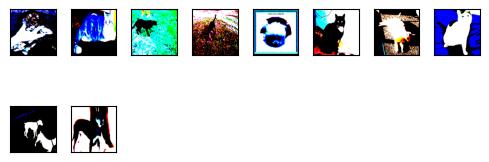

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [6]:
def plotImages(images):
    plt.figure(figsize=(5,5))
    for i in range(len(images)):
        plt.subplot(5,8,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])
    plt.tight_layout()
    plt.show()
imgs, labels = next(train_batches)
plotImages(imgs)
print(labels)

In [7]:
def get_model(name):
    if name == '1':
        inputs = keras.Input(shape=(224,224,3), name="images-input")
        x = layers.Conv2D(32, 3, activation='relu', padding='same')(inputs)
        x = layers.MaxPool2D(pool_size=2, strides=2)(x)
        x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
        x = layers.MaxPool2D(pool_size=2, strides=2)(x)
        x = layers.Flatten()(x)
        outputs = layers.Dense(units=2, activation='softmax')(x)
        model = keras.Model(inputs, outputs, name='conv3_classifier')
    elif name == 'Resnet':
        inputs = keras.Input(shape=(224,224,3), name="images-input")
        x = layers.Conv2D(64, 3, activation="relu", padding="same", strides=1)(inputs)
        x = layers.Conv2D(64, 3, activation="relu", padding="same", strides=1)(x)
        x = layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding="valid")(x)

        x = layers.Conv2D(128, 3, activation="relu", padding="same", strides=1)(x)
        x = layers.Conv2D(128, 3, activation="relu", padding="same", strides=1)(x)
        x = layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding="valid")(x)

        x = layers.Conv2D(256, 3, activation="relu", padding="same", strides=1)(x)
        x = layers.Conv2D(256, 3, activation="relu", padding="same", strides=1)(x)
        x = layers.Conv2D(256, 3, activation="relu", padding="same", strides=1)(x)
        x = layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding="valid")(x)

        x = layers.Conv2D(512, 3, activation="relu", padding="same", strides=1)(x)
        x = layers.Conv2D(512, 3, activation="relu", padding="same", strides=1)(x)
        x = layers.Conv2D(512, 3, activation="relu", padding="same", strides=1)(x)
        x = layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding="valid")(x)

        x = layers.Conv2D(512, 3, activation="relu", padding="same", strides=1)(x)
        x = layers.Conv2D(512, 3, activation="relu", padding="same", strides=1)(x)
        x = layers.Conv2D(512, 3, activation="relu", padding="same", strides=1)(x)
        x = layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid")(x)

        x = layers.Flatten()(x)
        x = layers.Dense(4096, activation="relu")(x)
        x = layers.Dense(4096, activation="relu")(x)
        outputs = layers.Dense(2, activation="softmax")(x)
        model = keras.Model(inputs, outputs, name='Resnet_classifier')
    elif name=='Vgg':
        inputs = keras.Input(shape=(224,224,3), name="images-input")
        x = layers.Conv2D(64, 3, activation="relu", padding="same", strides=1)(inputs)
        x = layers.Conv2D(64, 3, activation="relu", padding="same", strides=1)(x)
        x = layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding="valid")(x)

        x = layers.Conv2D(128, 3, activation="relu", padding="same", strides=1)(x)
        x = layers.Conv2D(128, 3, activation="relu", padding="same", strides=1)(x)
        x = layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding="valid")(x)

        x = layers.Conv2D(256, 3, activation="relu", padding="same", strides=1)(x)
        x = layers.Conv2D(256, 3, activation="relu", padding="same", strides=1)(x)
        x = layers.Conv2D(256, 3, activation="relu", padding="same", strides=1)(x)
        x = layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding="valid")(x)

        x = layers.Conv2D(512, 3, activation="relu", padding="same", strides=1)(x)
        x = layers.Conv2D(512, 3, activation="relu", padding="same", strides=1)(x)
        x = layers.Conv2D(512, 3, activation="relu", padding="same", strides=1)(x)
        x = layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding="valid")(x)

        x = layers.Conv2D(512, 3, activation="relu", padding="same", strides=1)(x)
        x = layers.Conv2D(512, 3, activation="relu", padding="same", strides=1)(x)
        x = layers.Conv2D(512, 3, activation="relu", padding="same", strides=1)(x)
        x = layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid")(x)

        x = layers.Flatten()(x)
        x = layers.Dense(4096, activation="relu")(x)
        x = layers.Dense(4096, activation="relu")(x)
        outputs = layers.Dense(2, activation="softmax")(x)
        model = keras.Model(inputs, outputs, name='Vgg_classifier')
    else:
        raise RuntimeError('error')
    return model

In [8]:
model = get_model(algorithm)
model.summary()

Model: "Vgg_classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 images-input (InputLayer)   [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                    

In [9]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),
     loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x=train_batches, epochs=epochs, verbose=1)

Epoch 1/15
410/410 [==============================] - 594s 1s/step - loss: 0.7026 - accuracy: 0.5146
Epoch 2/15
410/410 [==============================] - 80s 195ms/step - loss: 0.6913 - accuracy: 0.5112
Epoch 3/15
410/410 [==============================] - 79s 194ms/step - loss: 0.6925 - accuracy: 0.5295
Epoch 4/15
410/410 [==============================] - 79s 193ms/step - loss: 0.6884 - accuracy: 0.5339
Epoch 5/15
410/410 [==============================] - 79s 192ms/step - loss: 0.6907 - accuracy: 0.5363
Epoch 6/15
410/410 [==============================] - 79s 192ms/step - loss: 0.6871 - accuracy: 0.5522
Epoch 7/15
410/410 [==============================] - 79s 192ms/step - loss: 0.6764 - accuracy: 0.5822
Epoch 8/15
410/410 [==============================] - 79s 192ms/step - loss: 0.6440 - accuracy: 0.6417
Epoch 9/15
410/410 [==============================] - 79s 193ms/step - loss: 0.6150 - accuracy: 0.6685
Epoch 10/15
410/410 [==============================] - 79s 193ms/step - los

In [10]:
import datetime
datetime_dt = datetime.datetime.today()
datetime_str = datetime_dt.strftime("%Y-%m-%d_%H-%M")
model.save(f'{model.name}_{datetime_str}.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.tail()

,loss,accuracy
10,0.530792,0.734390
11,0.515175,0.764634
12,0.468774,0.781951
13,0.422129,0.804146
14,0.394189,0.835854


from matplotlib import pyplot as plt
_df_0['loss'].plot(kind='hist', bins=20, title='loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['accuracy'].plot(kind='hist', bins=20, title='accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='loss', y='accuracy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['accuracy']
  ys = series['loss']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('accuracy', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('accuracy')
_ = plt.ylabel('loss')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['accuracy']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'accuracy'}, axis=1)
              .sort_values('accuracy', ascending=True))
  xs = counted['accuracy']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('accuracy', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('accuracy')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['loss'].plot(kind='line', figsize=(8, 4), title='loss')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['accuracy'].plot(kind='line', figsize=(8, 4), title='accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

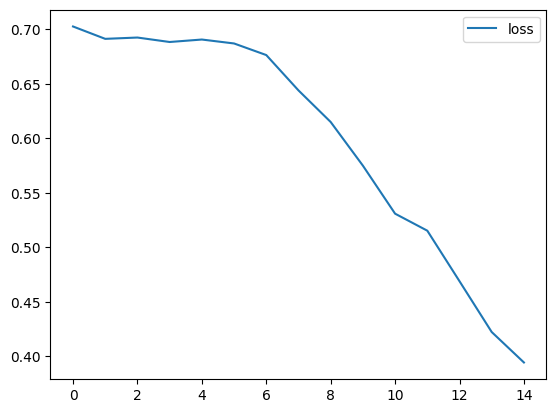

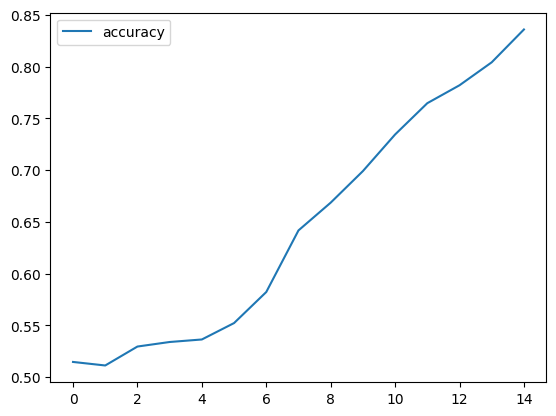

In [12]:
history_frame.loc[:, ['loss']].plot()
plt.savefig(f'{model.name}_loss_{datetime_str}.png')
history_frame.loc[:, ['accuracy']].plot()
plt.savefig(f'{model.name}_acc_{datetime_str}.png')

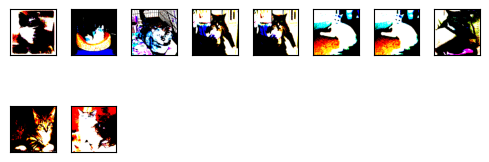

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [24]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [30]:
x, y = next(test_batches)
test_scores = model.evaluate(x, y, verbose=1)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

1/1 [==============================] - 0s 103ms/step - loss: 0.4734 - accuracy: 0.9000
Test loss: 0.4733899235725403
Test accuracy: 0.8999999761581421
